In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector

from tqdm import tqdm

from utils import *
%autoreload 2

In [4]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_Jul2021.root:sixBtree"
ttree = ut.open(filename)
branches = Branches(ttree)
preselection = Selection(branches,cuts={"njetcut":6},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = Selection(branches,mask=sixb_in_preselection,include=preselection,tag="baseline")
print(baseline)
branches.calc_jet_dr(baseline.jets_selected)

=== File Info ===
File: ../mc/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8.root
Total Events:    16777217.0
Selected Events: 3748
--- all preselection ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.00
--- all baseline ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.00


--- all preselection ---
Event Efficiency:   0.74
Selected Purity(6): 0.29
Passed Jet S/T:     0.69


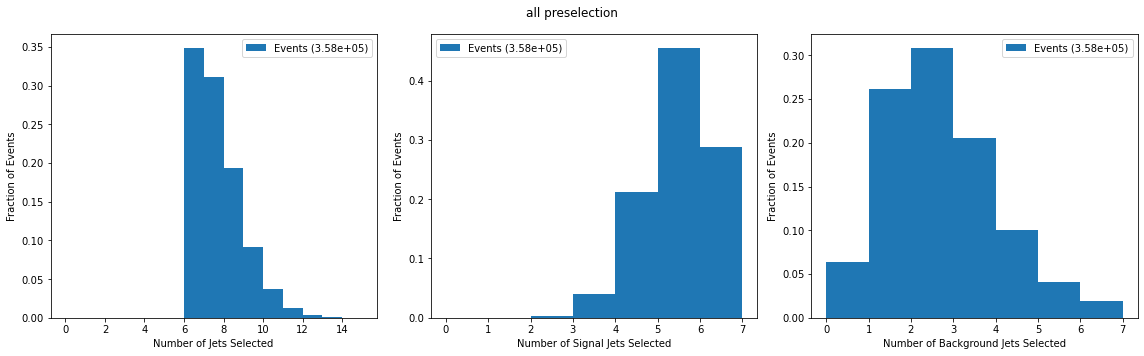

In [3]:
njet_study(preselection,density=1)

# Signal Jet Selection

In [4]:
ordered = btag_bias_pt_ordering(branches,baseline)

In [5]:
signal_baseline = signal_ordered(branches,baseline)
signal_order = signal_ordered(branches,ordered)

In [6]:
jet6_baseline = signal_baseline.selected_njets(6)
jet6_order = signal_order.selected_njets(6)

In [8]:
print(jet6_baseline)
print(jet6_order)
print(signal_order.selected_njets(7))

--- 6 signal selection ---
Event Efficiency:   0.63
Selected Purity(6): 0.72
Passed Jet S/T:     0.78
--- (all btag bias pt ordered & 6 signal selection) ---
Event Efficiency:   0.63
Selected Purity(6): 0.77
Passed Jet S/T:     0.78
--- (all btag bias pt ordered & 7 signal selection) ---
Event Efficiency:   0.63
Selected Purity(6): 0.91
Passed Jet S/T:     0.78
